<a href="https://colab.research.google.com/github/Tirta2241720045/Machine_Learning/blob/main/Minggu14/Quiz_2_2241720045_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# KUIS 2 PEMBELAJARAN MESIN
Face Detection dan Face Recognition
# Intro

Pada kuis ini, Anda diminta untuk melakukan face detection dan face recognition pada wajah dengan menggunakan dataset primer (dataset wajah yang kalian kumpulkan sendiri).
Spesifikasi pengerjaan kuis yang harus dipehuni adalah,

1. Gunakan pre-trained model haarcascade_frontalface_default.xml untuk face detection
2. Gunakan pre-trained model faceNet untuk face recognition
3. Gunakan model CNN untuk face recognition

#Nama: Tirta Nurrochman Bintang Prawira
#NIM: 2241720045
#No.Absen/Kelas: 27/TI-3A
#Kuis 2 Face Detection dan Face Recognition

In [65]:
!pip install opencv-python opencv-python-headless tensorflow numpy matplotlib scikit-learn
!pip install keras-facenet


#1. Deteksi Wajah Menggunakan Haar Cascade

Processing Happy folder...


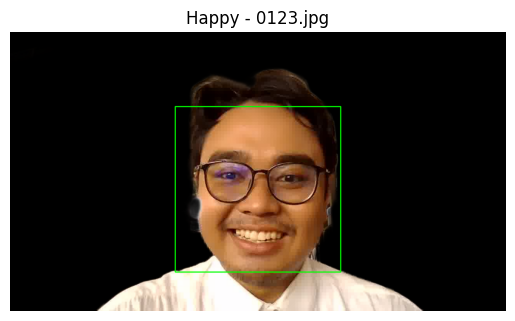

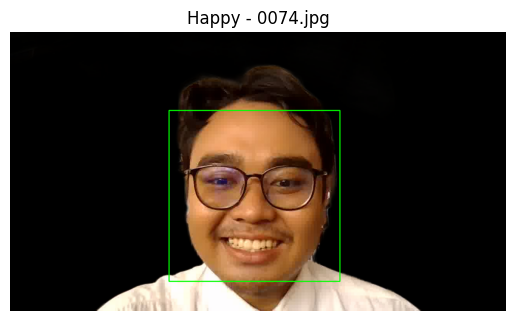

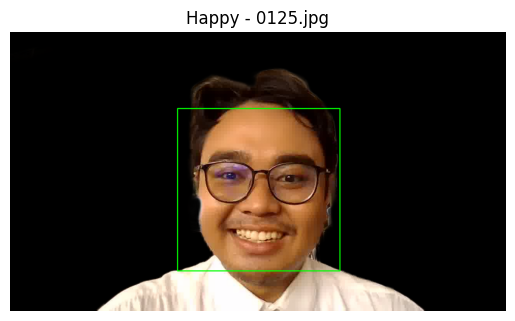

Processing .ipynb_checkpoints folder...
Processing Sad folder...


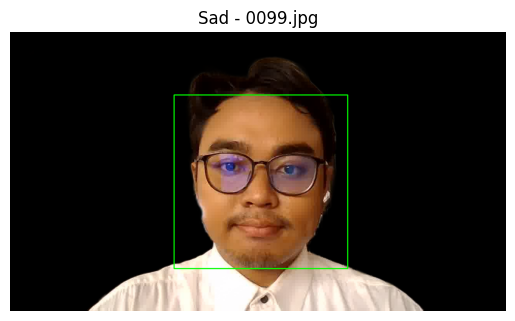

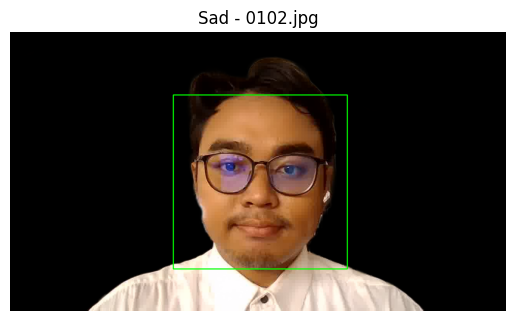

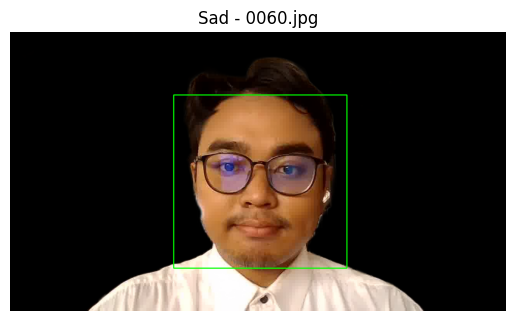

Processing Normal folder...


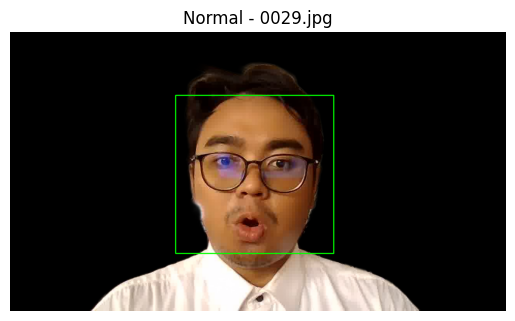

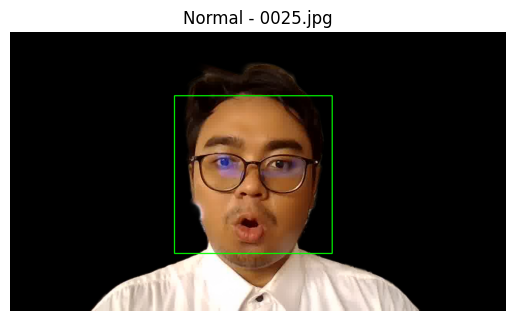

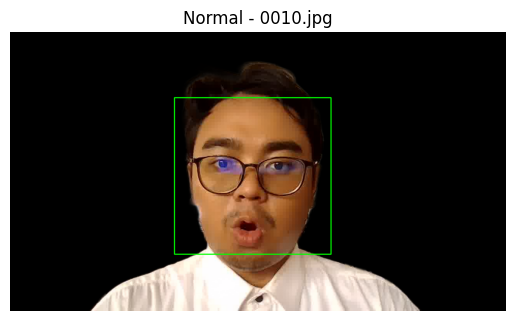

In [4]:
import cv2
import os
import matplotlib.pyplot as plt

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

def detect_face_from_dataset(dataset_path):
    for emotion_folder in os.listdir(dataset_path):
        emotion_path = os.path.join(dataset_path, emotion_folder)
        if os.path.isdir(emotion_path):
            print(f"Processing {emotion_folder} folder...")
            image_count = 0  # Counter to limit the number of images processed
            for image_name in os.listdir(emotion_path):
                if image_count >= 3:  # Process only 3 images
                    break
                image_path = os.path.join(emotion_path, image_name)
                if image_name.endswith('.jpg'):
                    img = cv2.imread(image_path)
                    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

                    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

                    for (x, y, w, h) in faces:
                        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

                    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    plt.imshow(img_rgb)
                    plt.title(f"{emotion_folder} - {image_name}")
                    plt.axis('off')
                    plt.show()

                    image_count += 1  # Increment the counter after processing an image

dataset_path = '/content/drive/MyDrive/dataset/Expression'
detect_face_from_dataset(dataset_path)


#2. Ekstraksi Face Embeddings Menggunakan FaceNet

In [1]:
!pip install --upgrade Pillow
!pip install --upgrade facenet-pytorch

  Using cached pillow-11.0.0-cp310-cp310-manylinux_2_28_x86_64.whl.metadata (9.1 kB)
Using cached pillow-11.0.0-cp310-cp310-manylinux_2_28_x86_64.whl (4.4 MB)
  Attempting uninstall: Pillow
    Found existing installation: pillow 10.2.0
    Uninstalling pillow-10.2.0:
      Successfully uninstalled pillow-10.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
facenet-pytorch 2.6.0 requires Pillow<10.3.0,>=10.2.0, but you have pillow 11.0.0 which is incompatible.


  Using cached pillow-10.2.0-cp310-cp310-manylinux_2_28_x86_64.whl.metadata (9.7 kB)
Using cached pillow-10.2.0-cp310-cp310-manylinux_2_28_x86_64.whl (4.5 MB)
  Attempting uninstall: Pillow
    Found existing installation: pillow 11.0.0
    Uninstalling pillow-11.0.0:
      Successfully uninstalled pillow-11.0.0


In [1]:
from facenet_pytorch import InceptionResnetV1, MTCNN
import torch
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

mtcnn = MTCNN(keep_all=True)
model = InceptionResnetV1(pretrained='vggface2').eval()

def get_face_embedding(face_image):
    faces = mtcnn(face_image)
    if faces is not None:
        embeddings = model(faces)
        return embeddings
    else:
        return None

def extract_embeddings_from_dataset(dataset_path):
    embeddings = []
    labels = []
    emotion_labels = {'Happy': 0, 'Normal': 1, 'Sad': 2}

    for emotion_folder in os.listdir(dataset_path):
        emotion_path = os.path.join(dataset_path, emotion_folder)
        if os.path.isdir(emotion_path):
            for image_name in os.listdir(emotion_path):
                image_path = os.path.join(emotion_path, image_name)
                if image_name.endswith('.jpg'):
                    img = cv2.imread(image_path)
                    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

                    face_embeddings = get_face_embedding(img_rgb)

                    if face_embeddings is not None:
                        face_embeddings = face_embeddings.detach().numpy().squeeze()
                        embeddings.append(face_embeddings)
                        labels.append(emotion_labels[emotion_folder])

    return np.array(embeddings), np.array(labels)

dataset_path = '/content/drive/MyDrive/dataset/Expression'
embeddings, labels = extract_embeddings_from_dataset(dataset_path)
print(f"Embeddings shape: {embeddings.shape}, Labels shape: {labels.shape}")

  0%|          | 0.00/107M [00:00<?, ?B/s]

Embeddings shape: (450, 512), Labels shape: (450,)


#3. Pelatihan Model CNN untuk Face Recognition

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
46/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3269 - loss: 1.0987     Epoch 1: Accuracy = 0.3646, Val_Accuracy = 0.3194
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3426 - loss: 1.0978 - val_accuracy: 0.3194 - val_loss: 1.0945
Epoch 2/50
43/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3561 - loss: 1.0940 Epoch 2: Accuracy = 0.4340, Val_Accuracy = 0.5694
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3766 - loss: 1.0932 - val_accuracy: 0.5694 - val_loss: 1.0900
Epoch 3/50
50/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6030 - loss: 1.0882 Epoch 3: Accuracy = 0.6424, Val_Accuracy = 0.6667
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6162 - loss: 1.0880 - val_accuracy: 0.6667 - val_loss: 1.0858
Epoch 4/50
46/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6984 - loss: 1.0840 Epoch 4: Accuracy = 0.6806, Val_Accuracy = 0.6667
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6919 - loss: 1.0841 - val_accuracy: 0.6667 - val_loss: 1.0817


Test Accuracy: 100.00%
Model saved to /content/drive/MyDrive/dataset/Expression/expression_model.h5


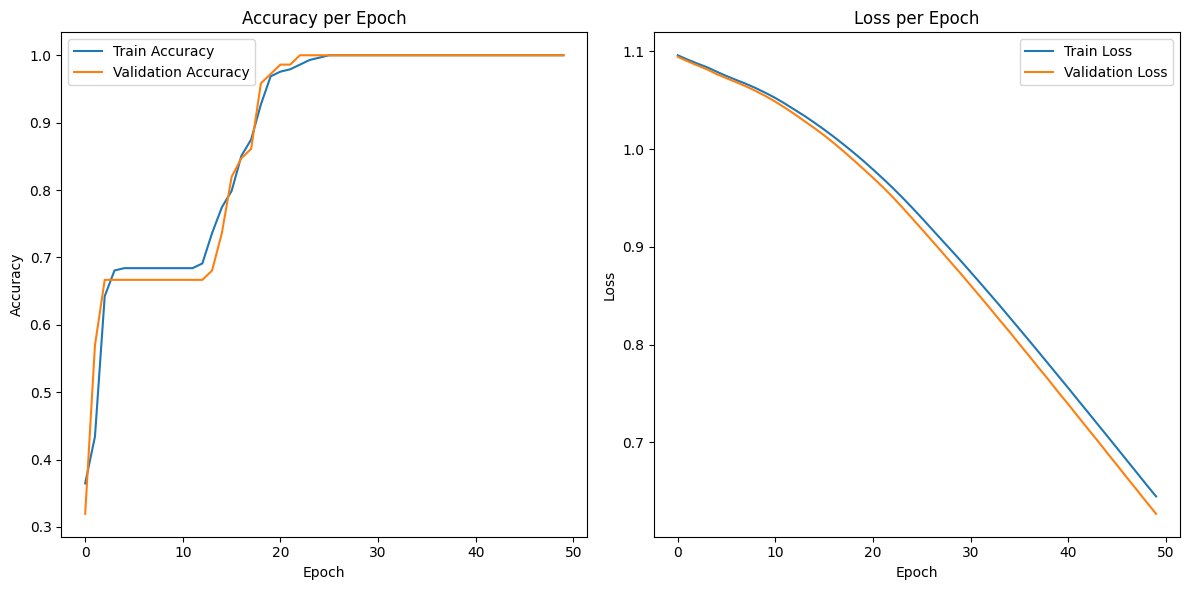

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

X_train, X_test, y_train, y_test = train_test_split(embeddings, labels_encoded, test_size=0.2, random_state=42)

def create_cnn_model(input_shape, num_classes):
    model = Sequential([
        Dense(32, activation='relu', input_shape=input_shape),
        Dense(48, activation='relu'),
        Dense(64, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    return model

input_shape = (embeddings.shape[1],)
num_classes = len(np.unique(labels_encoded))
model = create_cnn_model(input_shape, num_classes)

adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)

model.compile(optimizer=adam_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

class AccuracyHistory(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1}: Accuracy = {logs['accuracy']:.4f}, Val_Accuracy = {logs['val_accuracy']:.4f}")

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=4,
    callbacks=[AccuracyHistory()]
)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

model_save_path = '/content/drive/MyDrive/dataset/Expression/expression_model.h5'
model.save(model_save_path)
print(f'Model saved to {model_save_path}')

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Saving 0001.jpg to 0001.jpg
Saving 0035.jpg to 0035.jpg
Saving 0062.jpg to 0062.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Predicted emotion for /content/0001.jpg: Sad


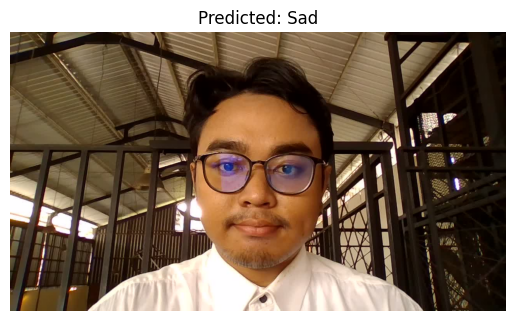

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Predicted emotion for /content/0035.jpg: Normal


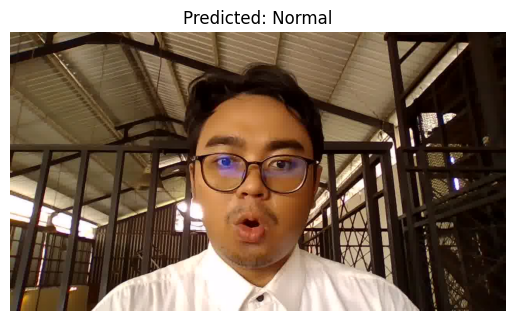

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Predicted emotion for /content/0062.jpg: Happy


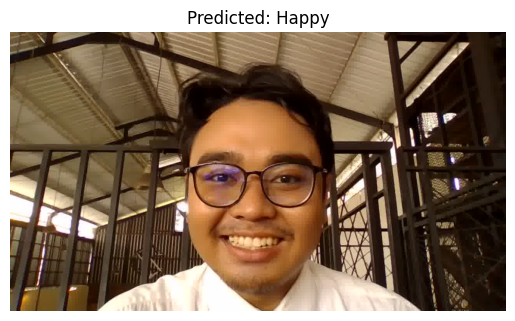

In [3]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model
from facenet_pytorch import MTCNN, InceptionResnetV1

mtcnn = MTCNN(keep_all=True)
model = InceptionResnetV1(pretrained='vggface2').eval()

model_path = '/content/drive/MyDrive/dataset/Expression/expression_model.h5'
cnn_model = load_model(model_path)

emotion_labels = {0: 'Happy', 1: 'Normal', 2: 'Sad'}

def get_face_embedding(face_image):
    faces = mtcnn(face_image)
    if faces is not None:
        embeddings = model(faces)
        return embeddings
    return None

def process_and_predict(image_path):
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    face_embeddings = get_face_embedding(img_rgb)

    if face_embeddings is not None:
        face_embeddings = face_embeddings.detach().numpy().squeeze()

        pred = cnn_model.predict(np.expand_dims(face_embeddings, axis=0))
        predicted_class = np.argmax(pred, axis=1)

        predicted_label = emotion_labels[predicted_class[0]]
        print(f"Predicted emotion for {image_path}: {predicted_label}")

        plt.imshow(img_rgb)
        plt.title(f"Predicted: {predicted_label}")
        plt.axis('off')
        plt.show()
    else:
        print(f"No face detected in the image: {image_path}")

uploaded = files.upload()

uploaded_images = list(uploaded.keys())[:3]

for image_name in uploaded_images:
    image_path = f"/content/{image_name}"
    process_and_predict(image_path)